# Ch02-2 데이터 전처리

## 넘파이로 데이터 준비

In [1]:
# http://bit.ly/bream_smelt
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
np.column_stack(([1,2,3], [4,5,6]))     # 튜플로 전달

array([[1, 4],
       [2, 5],
       [3, 6]])

**column_stack()** : 전달 받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결

In [4]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


numpy를 이용하면 일일이 값을 꺼내서 리스트로 생성하지 않아도 됨.

또, 데이터가 클수록 파이썬 리스트는 비효율적이므로 넘파이 배열을 사용하는 것이 좋음.

In [5]:
print(np.ones(5))
print(np.zeros(5))

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [6]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


타겟 데이터도 넘파이를 이용해서 생성할 수 있음.

35마리의 도미(1)와 14마리의 빙어(0)

## 훈련 세트와 테스트 세트 나누기

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42
)

In [9]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


훈련 데이터 36개, 테스트 데이터 13개로 나뉨.

In [10]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


13개의 테스트 세트 중에 10개가 도미(1), 3개가 빙어(0) → 빙어의 비율이 모자름

In [11]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42, stratify=fish_target
)

In [12]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


stratify 매개변수에 타겟 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눔.

## K-최근접 이웃 훈련

In [13]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [14]:
# 길이 25, 무게 150인 데이터가 어떻게 분류되는지 예측함.
print(kn.predict([[25, 150]]))

[0.]


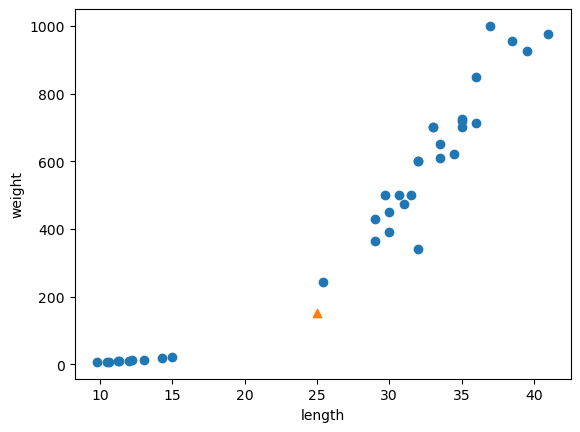

In [15]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [16]:
# kneighbors() : 주어진 샘플에서 가장 가까운 이웃을 찾아줌.
distances, indexes = kn.kneighbors([[25, 150]])
print(distances)
print(indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


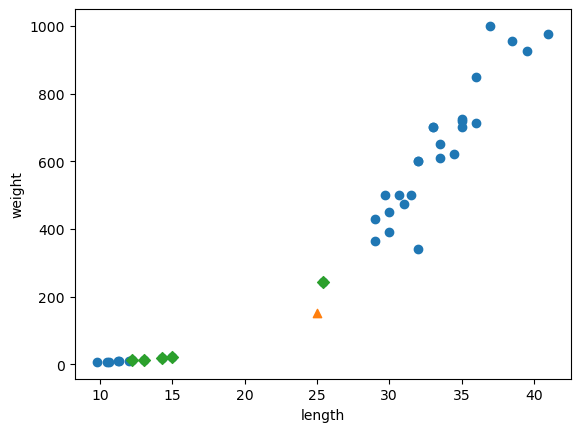

In [17]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')     # marker='D' : 마름모
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

삼각형 샘플(25, 150)에 가장 가까운 5개의 샘플이 초록 마름모로 표시됨.

가장 가까운 이웃에는 빙어가 압도적으로 많음. → 이대로라면 이 샘플의 클래스를 빙어로 예측하게 됨.

In [18]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [19]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [20]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


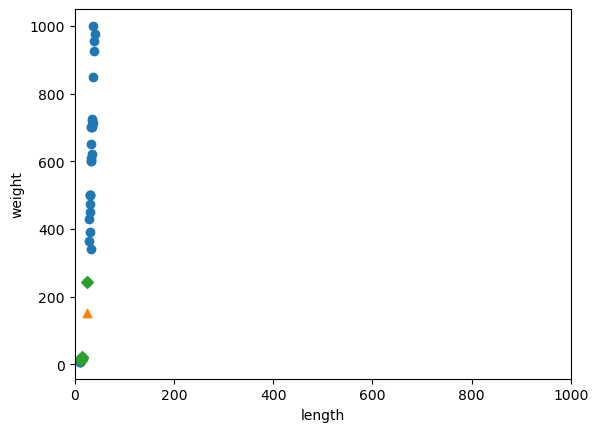

In [ ]:
# 위에서 그렸던 plot은 x축과 y축의 범위가 매우 달라서 극단적으로 멀어보였음.
# 그래서 x축의 범위를 y축과 동일하게 맞춰서 다시 그림.
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))     # x축 범위 0~1000으로 제한
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


샘플 간의 거리에 영향을 많이 받는 알고리즘을 사용할 때는, 특성값을 일정한 기준으로 맞춰 주어야 함. ☞ **데이터 전처리**

**표준점수(Z-Score)** : 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타냄.